In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

# Importing Retail
dataset_retail = pd.read_excel('Online_retail.xlsx')

# Importing Client .csv files resulting from Gephi
table_client = pd.read_csv('TableClient-Client-Nodes.csv', delimiter=';')

table_client_edges = pd.read_csv('TableClient-Client-Edges.csv', delimiter=';')

# Importing Product .csv files resulting from Gephi
table_product = pd.read_csv('TableProduct-Product-Nodes.csv', delimiter=';')

table_product_edges = pd.read_csv('TableProduct-Product-Edges.csv', delimiter=';')

# Importing Product-Product and Client-Client files
product_product = pd.read_csv('Product-Product.csv', delimiter=';')

client_client = pd.read_csv('Client-Client.csv', delimiter=';')

# Product-Product

Number of nodes: 2619
Number of edges: 128190


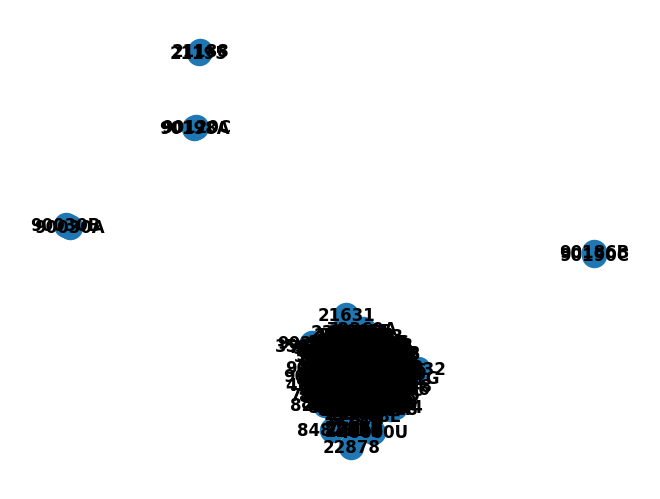

In [12]:
# Creating a graph from the edge list (Product-Product)
graph_product = nx.from_pandas_edgelist(product_product, source='Source', target='Target')

# Basic network analysis
print(f'Number of nodes: {graph_product.number_of_nodes()}')
print(f'Number of edges: {graph_product.number_of_edges()}')

# Drawing the graph
nx.draw(graph_product, with_labels=True, font_weight='bold')
plt.show()

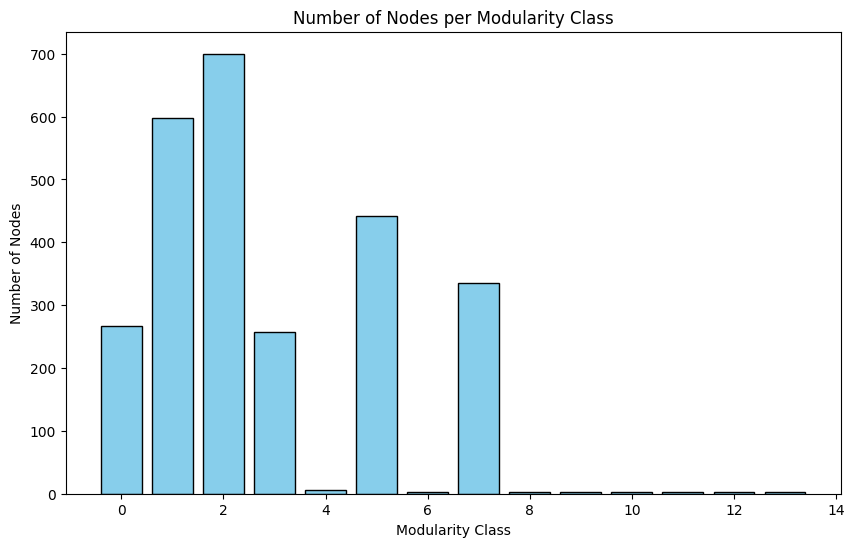

In [5]:
# Get modularity class and count the number of nodes per class
nodes_per_class_product = table_product.groupby('modularity_class', as_index=False)['Id'].count()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes_per_class_product.modularity_class, nodes_per_class_product.Id, color='skyblue', edgecolor='black')
plt.title('Number of Nodes per Modularity Class')
plt.xlabel('Modularity Class')
plt.ylabel('Number of Nodes')
plt.show()

In [5]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Remove duplicates from dataset_retail
dataset_retail.drop_duplicates(keep=False, inplace=True)

# Merge product information with product-product network
merged_data = pd.merge(dataset_retail, table_product, left_on='StockCode', right_on='Id', how='left')

# Aggregate descriptions for each community
aggregated_descriptions = merged_data.groupby('modularity_class')['Description'].agg(lambda x: ' '.join(x.dropna())).reset_index()

# Tokenize and count occurrences per word for each community
word_counts_per_community = {}
for community, row in aggregated_descriptions.iterrows():
    tokens = word_tokenize(row['Description'])
    word_counts_per_community[community] = Counter(tokens)

# Find the most frequent words for each community
most_frequent_words_per_community = {}
for community, word_counts in word_counts_per_community.items():
    most_frequent_words = word_counts.most_common(5)
    most_frequent_words_per_community[community] = most_frequent_words

# Display the most frequent words for each community
for community, words in most_frequent_words_per_community.items():
    print(f"Community {community}: {words}")

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\maria/nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.7_3.7.2544.0_x64__qbz5n2kfra8p0\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.7_3.7.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data'
    - 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.7_3.7.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data'
    - 'C:\\Users\\maria\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


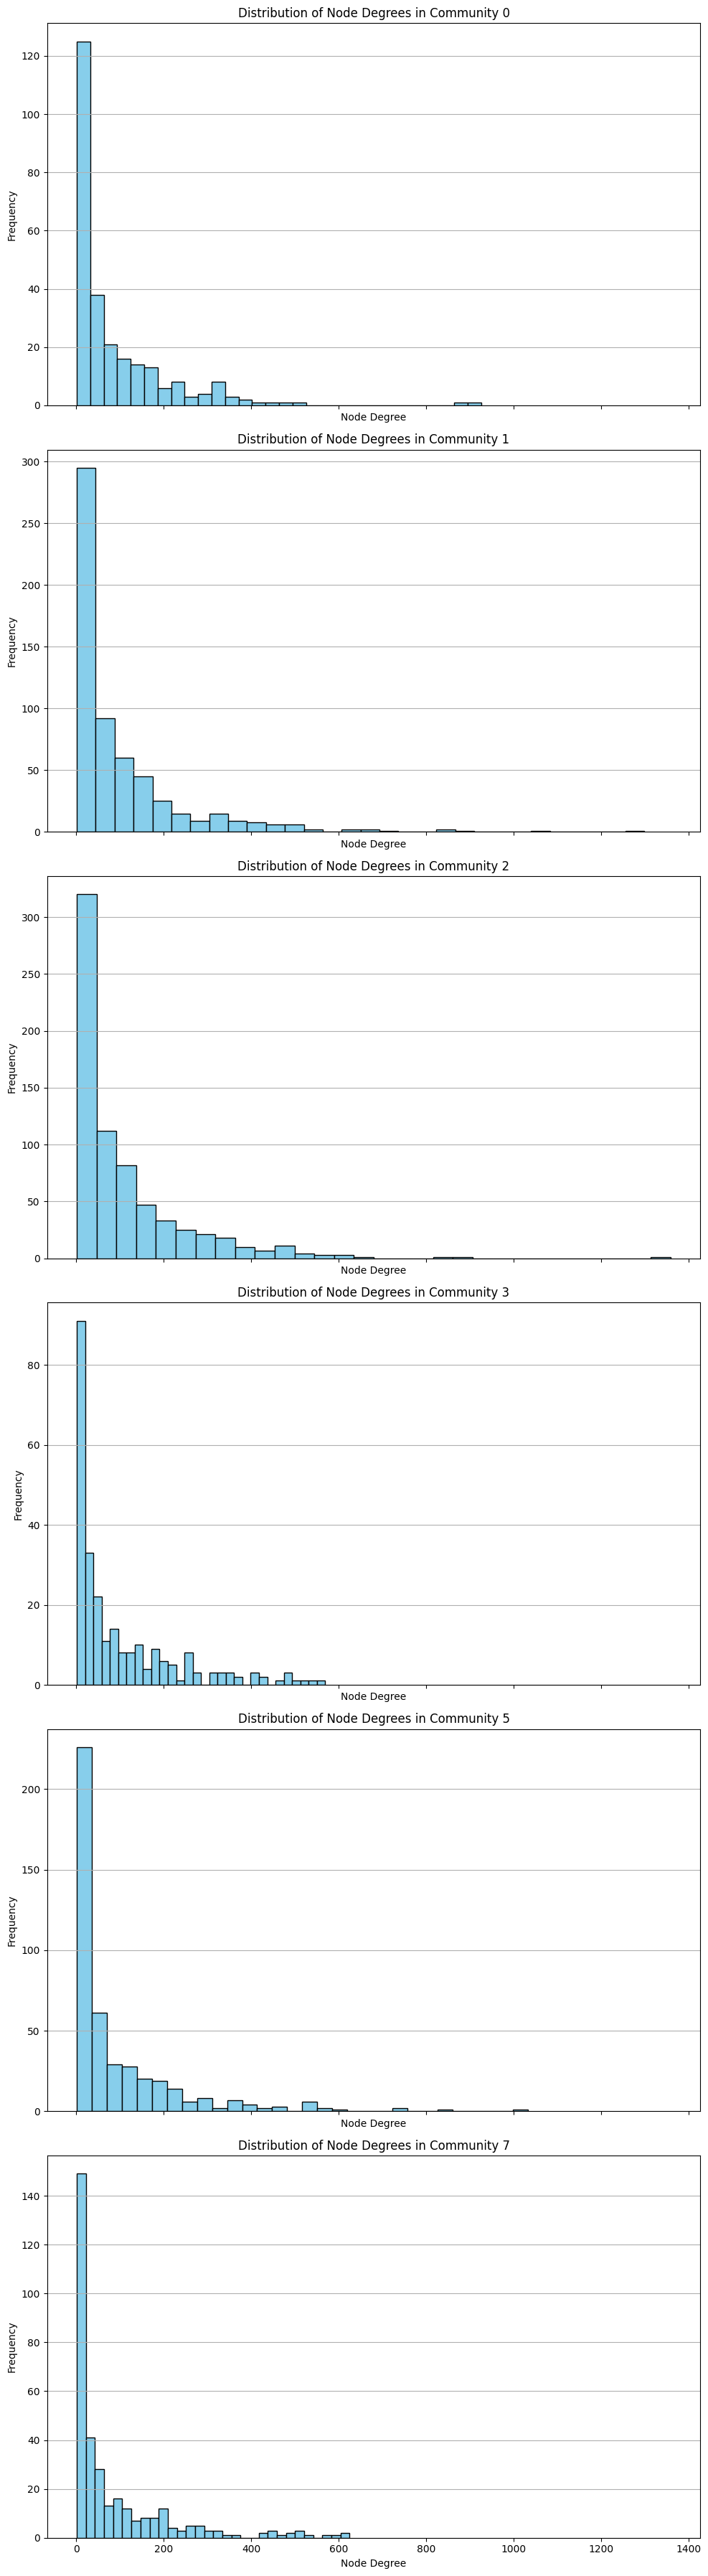

In [8]:
# Define the community IDs you want to include
community_ids = [0, 1, 2, 3, 5, 7]

# Create subplots for each community
fig, axs = plt.subplots(len(community_ids), figsize=(10, 6*len(community_ids)), sharex=True)

# Iterate over each community ID and plot histogram
for i, community_id in enumerate(community_ids):
    # Filter data for the current community ID
    community_data = table_product[table_product['modularity_class'] == community_id]
    # Plot histogram for node degrees
    axs[i].hist(community_data['Degree'], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Distribution of Node Degrees in Community {community_id}')
    axs[i].set_xlabel('Node Degree')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()

In [7]:
# Drop duplicates from dataset_retail based on the 'StockCode' column
dataset_retail_unique = dataset_retail.drop_duplicates(subset=['StockCode'])

dataset_retail_unique['StockCode'] = dataset_retail_unique['StockCode'].astype(str)

# Sort the DataFrame by Degree and then by Id in descending order
sorted_products = table_product.sort_values(by=['Degree', 'Id'], ascending=[False, False])

# Select the top 5 distinct rows
top_5_products = sorted_products.drop_duplicates(subset=['Id']).head(5)

# Merge with the top 5 products based on the 'Id' and 'StockCode' columns
top_5_products_description = pd.merge(top_5_products, dataset_retail_unique, left_on='Id', right_on='StockCode', how='left')

# Display the top 5 products with descriptions
print(top_5_products_description[['Id', 'Description', 'Degree', 'modularity_class']])


       Id                         Description  Degree  modularity_class
0   21034        REX CASH+CARRY JUMBO SHOPPER    1359                 2
1  85123A  WHITE HANGING HEART T-LIGHT HOLDER    1299                 1
2   84879       ASSORTED COLOUR BIRD ORNAMENT    1072                 1
3   22423            REGENCY CAKESTAND 3 TIER    1032                 5
4   22138       BAKING SET 9 PIECE RETROSPOT      926                 0


C:\Users\maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Client-Client

Number of nodes: 1717
Number of edges: 275463


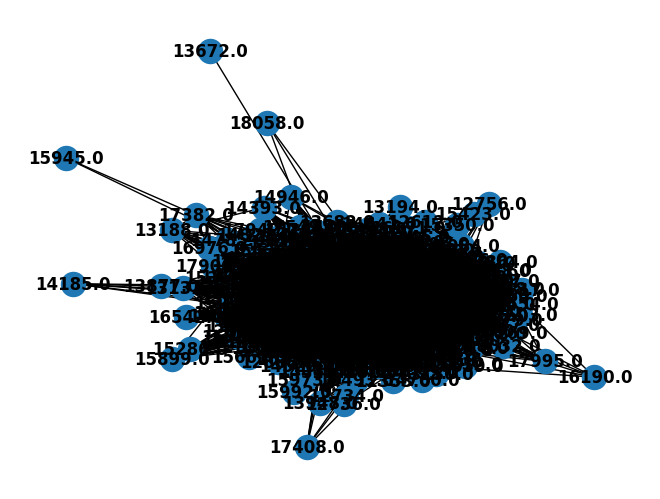

In [2]:
# Creating a graph from the edge list (Client-Client)
graph_client = nx.from_pandas_edgelist(client_client, source='Source', target='Target')

# Basic network analysis
print(f'Number of nodes: {graph_client.number_of_nodes()}')
print(f'Number of edges: {graph_client.number_of_edges()}')

# Drawing the graph
nx.draw(graph_client, with_labels=True, font_weight='bold')
plt.show()

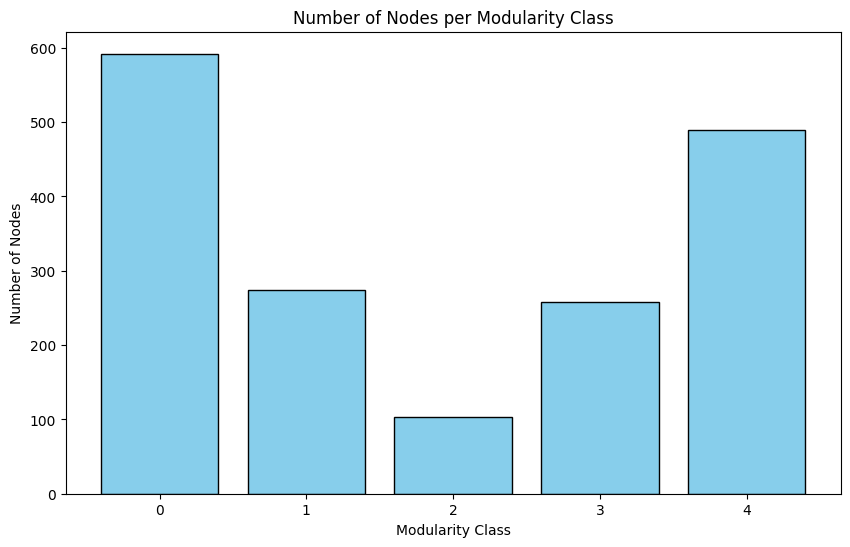

In [3]:
# Get modularity class and count the number of nodes per class
nodes_per_class_client = table_client.groupby('modularity_class', as_index=False)['Id'].count()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes_per_class_client.modularity_class, nodes_per_class_client.Id, color='skyblue', edgecolor='black')
plt.title('Number of Nodes per Modularity Class')
plt.xlabel('Modularity Class')
plt.ylabel('Number of Nodes')
plt.show()

In [16]:
# Group by Source and Weight and sum
customer_weights = table_client_edges.groupby('Source')['Weight'].sum().reset_index()

# Sort Weight values
customer_weights_sorted = customer_weights.sort_values(by='Weight', ascending=False)

print(customer_weights_sorted.head(5))

# Create histogram 

      Source  Weight
173  12965.0    5610
516  14179.0    4968
140  12838.0    4476
53   12556.0    3772
287  13357.0    3422


In [2]:
# Combining the 'Source' and 'Target' columns into a single column
all_ids = pd.concat([table_client_edges['Source'], table_client_edges['Target']])

# Counting the occurrences of each ID found
counting_ids = all_ids.value_counts()

print(counting_ids.head(5))

14179.0    1154
12965.0    1130
16788.0    1107
16374.0    1067
15464.0    1044
dtype: int64


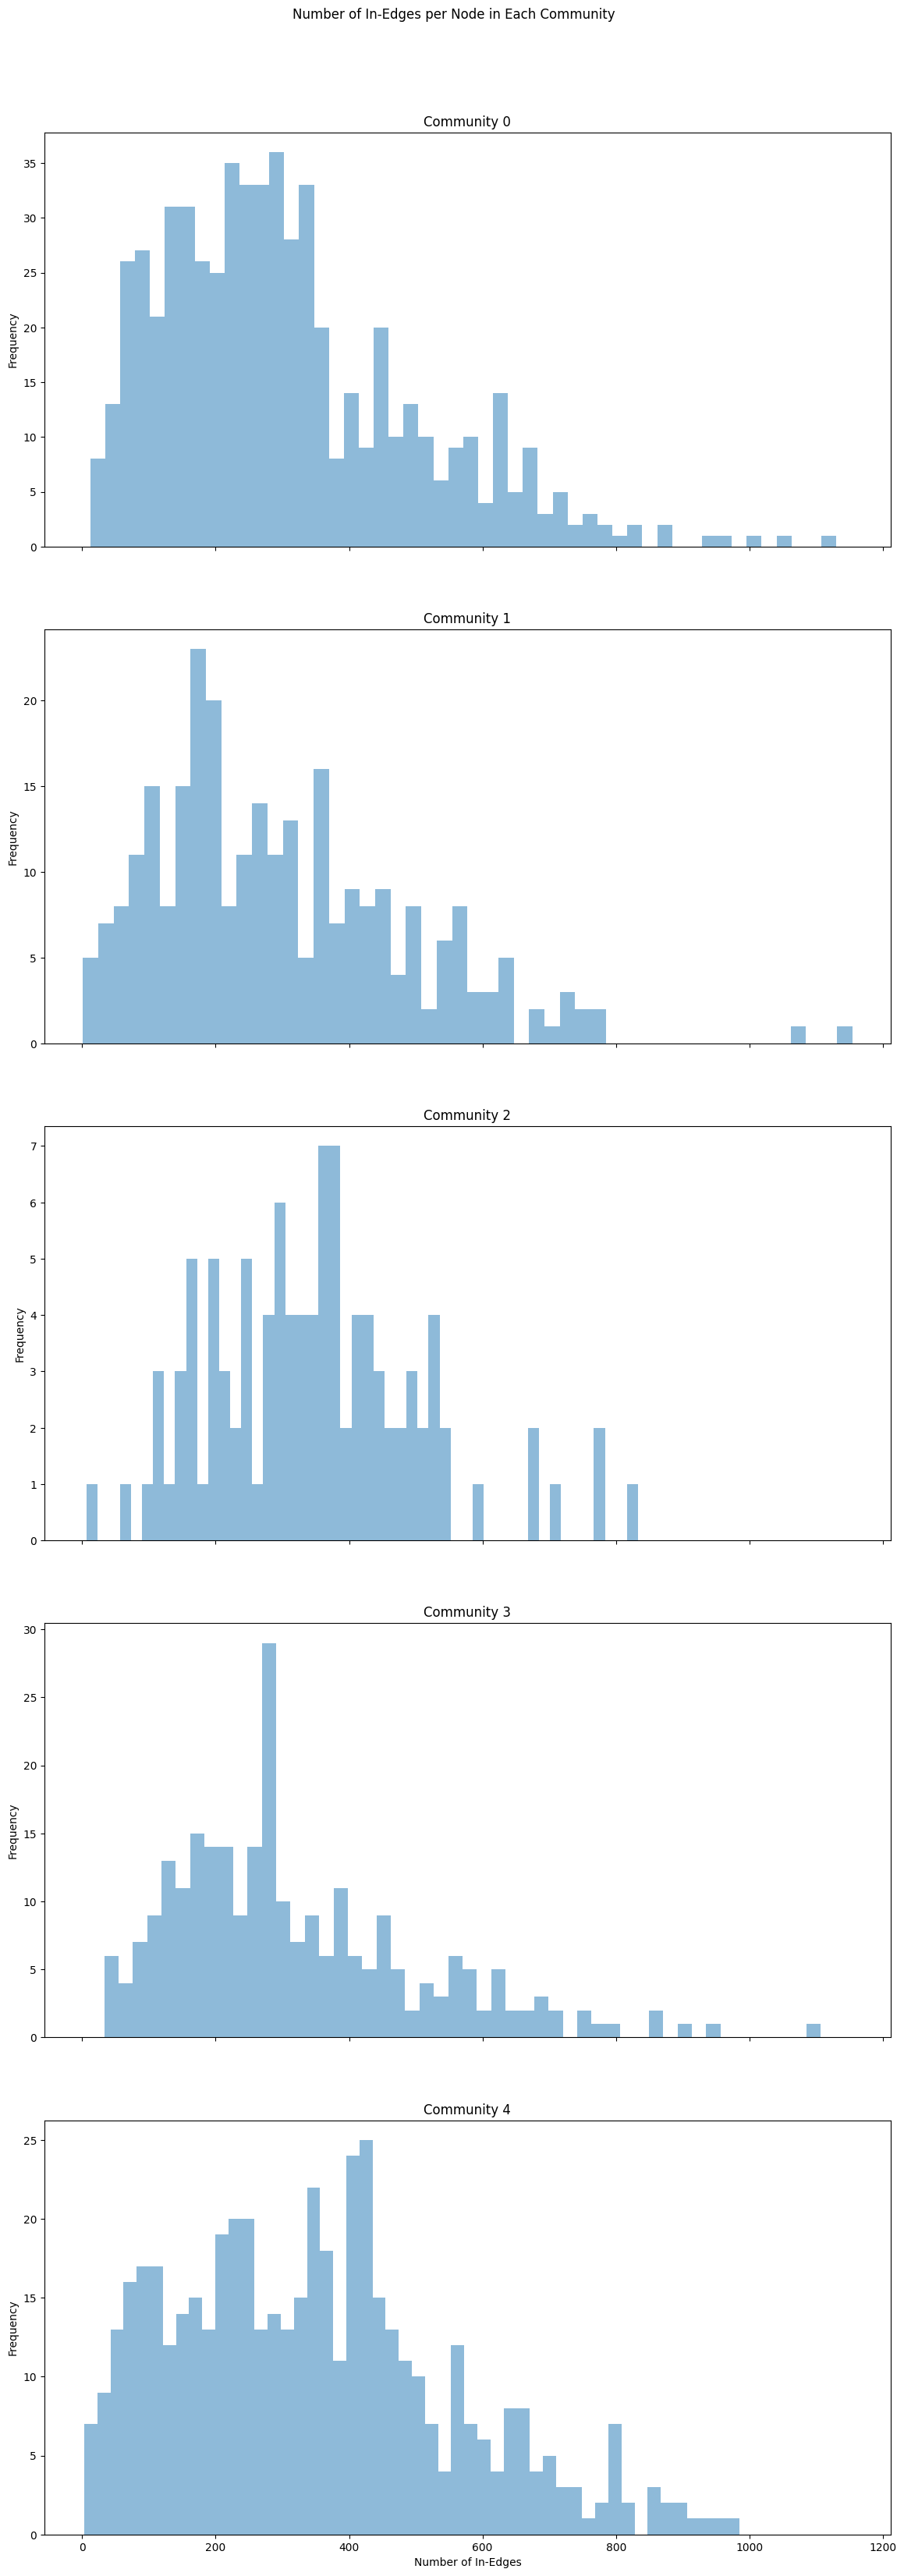

In [4]:
# Merge node information with the client-client network on 'Id' and 'Source'
merged_data = pd.merge(client_client, table_client, left_on='Source', right_on='Id', how='left')
merged_data.rename(columns={'modularity_class': 'Community'}, inplace=True)

# Create a directed graph from the client-client network edge list
G = nx.from_pandas_edgelist(merged_data, source='Source', target='Target', create_using=nx.DiGraph())

# Calculate the in-degree (number of edges coming into each node) for each node
in_degree_per_node = dict(G.in_degree())

# Get unique communities
unique_communities = sorted(merged_data['Community'].unique())

# Create subplots
fig, axs = plt.subplots(len(unique_communities), 1, figsize=(14, 8 * len(unique_communities)), sharex=True)

# Plot a histogram for each community
for idx, community in enumerate(unique_communities):
    group = merged_data[merged_data['Community'] == community]
    nodes = group['Source'].unique()
    in_degrees = [in_degree_per_node.get(node, 0) for node in nodes]
    axs[idx].hist(in_degrees, bins=50, alpha=0.5, label=f'Community {community}')
    axs[idx].set_title(f'Community {community}')
    axs[idx].set_ylabel('Frequency')

# Set common x-axis label
axs[-1].set_xlabel('Number of In-Edges')

plt.suptitle('Number of In-Edges per Node in Each Community', y=0.92)
plt.show()